<a href="https://colab.research.google.com/github/JoanNjoki/Health-Insurance-Cross-Sell-Prediction-Analysis/blob/main/Peaky_Miners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VEHICLE INSURANCE PROJECT

# 1.0 Defining the Question

## a) Specifying the data analytic question

> We are required to build a model that  predicts whether the policy holders (clients) will be interested in Vehicle Insurance provided by an insurance company.


## b) Defining the Metric for Success

> To be able to build and evaluate the performances of different classification algorithms that can help us predict whether or not a client will be interested in vehicle insurance. Our model will be considered a success if we achieve an accuracy of between 75% and 95% because an accuracy score of 100% might imply a case of overfitting while an accuracy of below 75% might showcase underfitting.

## c) Understanding the Context

> An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

> Just like medical insurance, there is vehicle insurance where every year a client needs to pay a premium of a certain amount to the insurance provider company so that in case of an unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## d) Recording the Experimental Design

> - Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Define the appropriateness of the available data with regards to the project
- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform univariate and bivariate analysis while recording our observations.
- Implement the solution by using the various classifier algorithms to predict whether a client will be interested in vehicle insurance basing on the information provided.
- Challenge the solution by giving insights on how we can optimize the models to give us a better performance as compared to the baseline model.
- Provide recommendations based on the whole analysis and modelling techniques used in the project.

## e) Data Relevance

> Variable Definitions in our dataset:
- Id - Unique ID for the customer
- Gender - Gender of the customer
- Age - Age of the customer
- Driving_License - 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code - Unique code for the region of the customer
- Previously_Insured1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age - Age of the Vehicle
- Vehicle_Damage - 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past 
- Annual_Premium - The amount customer needs to pay as premium in the year
- Policy Sales Channel - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage - Number of Days, Customer has been associated with the company
- Response - 1 : Customer is interested, 0 : Customer is not interested

> For clients to be able to get vehicle insurance for the first time, they are requested to gather personal information such as;
- Driver's license
- Date of birth / Age
- Insurance history
- Address / Region / Location
 
 > Also, you may be requested for vehicle information such as the vehicle identification number (VIN), date of purchase / vehicle age and also the person registered to the vehicle. 

 > All this information is necessary when it comes to car insurance and therefore we can conclude our dataset is relevant in helping us predict whether a client will purchase car insurance with an insurance company.

# 2.0 Reading the Data

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

> Mounting the drive from the Google colab to retrieve the huge datasets more conveniently

In [ ]:
# Import drive 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Reading the train dataset from the drive

In [ ]:
# We will name the dataframe df1
df1 = pd.read_csv('/content/drive/MyDrive/Project week core Module 2/train.csv')
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


> Reading the test dataset from the drive

In [ ]:
# We will name the test dataframe df2
df2 = pd.read_csv('/content/drive/MyDrive/Project week core Module 2/test.csv')
df2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


###### Dataset Description

In [ ]:
# A nice data dictionary will help us better understand the data

data ={
'Variable' : ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],

    'Definition' : ['Unique ID for the customer','Gender of customer','Age of the customer','If customer has a driving licence','Unique code for the region of the customer',
                    'If the customer had previous insured','Age of the vehicle','If customer cars had been damaged previously','Amount the customer needs to pay as premium in a year',
                   'Anonymized Code for the channel of outreaching to the customer',"Number of customers associated with the company","If customer is interested"]}

Data_Dictionary = pd.DataFrame(data = data,columns=['Variable','Definition','Key'])
Data_Dictionary.fillna(' ', inplace=True)
Data_Dictionary
Data_Dictionary.Key[3] = '1:Has driving licence, 0:doesn\'t have driving licence'
Data_Dictionary.Key[5] = "1:Previously insured,0:wasn\'t insured"
Data_Dictionary.Key[7] = ' 1 : Customer vehicle damaged in the past, 0 : Customer didn\'t get his/her vehicle damaged in the past'
Data_Dictionary.Key[11] = '1 : Customer is interested, 0 : Customer is not interested'
Data_Dictionary

,Variable,Definition,Key
0,id,Unique ID for the customer,
1,Gender,Gender of customer,
2,Age,Age of the customer,
3,Driving_License,If customer has a driving licence,"1:Has driving licence, 0:doesn't have driving ..."
4,Region_Code,Unique code for the region of the customer,
5,Previously_Insured,If the customer had previous insured,"1:Previously insured,0:wasn't insured"
6,Vehicle_Age,Age of the vehicle,
7,Vehicle_Damage,If customer cars had been damaged previously,"1 : Customer vehicle damaged in the past, 0 :..."
8,Annual_Premium,Amount the customer needs to pay as premium in...,
9,Policy_Sales_Channel,Anonymized Code for the channel of outreaching...,


# 3.0 Checking the Data

> Train dataset

In [ ]:
# Displaying the number of columns and rows in our train dataset
print('The shape of the train dataset is: ', df1.shape)

The shape of the train dataset is:  (381109, 12)


In [ ]:
# Displaying the top of the train dataset
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# Displaying the bottom of the train dataset
df1.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
# Checking the datatypes of our columns and confirming whether they are appropriate
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
# Checking the number of unique classes in each column
# This helps in categorizing whether a column is categorical, numerical or is an object
df1.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [ ]:
# Checking the general information about our train dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


> Test dataset

In [ ]:
# Displaying the number of columns and rows in our train dataset
print('The shape of the train dataset is: ', df2.shape)

The shape of the train dataset is:  (127037, 11)


In [ ]:
# Displaying the top of the train dataset
df2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
# Displaying the bottom of the train dataset
df2.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231


In [ ]:
# Checking the datatypes of our columns and confirming whether they are appropriate
df2.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [ ]:
# Checking the number of unique classes in each column
# This helps in categorizing whether a column is categorical, numerical or is an object
df2.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

In [ ]:
# Checking the general information about our dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


# 4.0 Data cleaning

Checking for null values in our datasets

In [ ]:
# We will check for the sum of the null values in our datasets
print('Null values for train dataset: \n',df1.isnull().sum())

Null values for train dataset: 
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


> We can conclude that both our datasets are complete since they do not contain null values. 

Checking for duplicated data

In [ ]:
print('Duplicated values in the train dataset: \n',df1.duplicated().sum())
#print('\n Duplicated values in the test dataset: \n',df2.duplicated().sum())

Duplicated values in the train dataset: 
 0


> We can conclude that our datasets are consistent since they do not have duplicate values.

Ensuring uniformity in our datasets

In [ ]:
# Making sure the column names are uniform by converting them to lower case
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [ ]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [ ]:
#df1['driving_license']=df1['driving_license'].astype('category')
#df1['previously_insured']=df1['previously_insured'].astype('category')
#df1['response']=df1['response'].astype('category')

In [ ]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

Checking for outliers


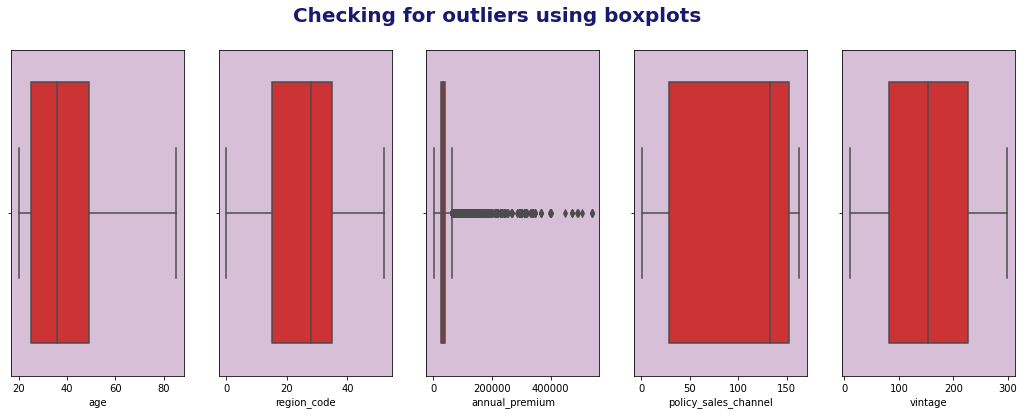

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

numerical_cols = df1[['age','region_code','annual_premium','policy_sales_channel','vintage']]
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(18,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='midnightblue')
for ax, data, column in zip(axes.flatten(),df1,numerical_cols):
  sns.boxplot(df1[column],ax=ax,palette='Set1')
  ax.set_facecolor('thistle')



**Insight**
 > From the boxplots above, we can conclude that there are outliers on the annual premium column. We decided not to drop them since they are an actual representation of the premiums clients pay annually and thus will be helpful in our analysis. 

# 5.0 Exploratory Data Analysis

## 5.1 Univariate Analysis

### 5.1.1 Categorical Variables

#### i) Frequency tables

In [ ]:
# Gender count
print('Gender: \n',df1.gender.value_counts())
# Driving license
print('\nClients with Driving License: \n',df1.driving_license.value_counts())
# Previously Insured
print('\nClients who were previously insured: \n',df1.previously_insured.value_counts())
# Region code
print('\nTop 10 most popular regions: \n',df1.region_code.value_counts().head(10))
# Vehicle Age
print('\nThe age distribution of the clients vehicles: \n',df1.vehicle_age.value_counts())
# Policy Sales Channels
print('\nThe popular policy sales channel used: \n',df1.policy_sales_channel.value_counts().head(10))
# Response
print('\nThe popular response given: \n',df1.response.value_counts())

Gender: 
 Male      206089
Female    175020
Name: gender, dtype: int64

Clients with Driving License: 
 1    380297
0       812
Name: driving_license, dtype: int64

Clients who were previously insured: 
 0    206481
1    174628
Name: previously_insured, dtype: int64

Top 10 most popular regions: 
 28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
Name: region_code, dtype: int64

The age distribution of the clients vehicles: 
 1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: vehicle_age, dtype: int64

The popular policy sales channel used: 
 152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
Name: policy_sales_channel, dtype: int64

The popular response given: 
 0    334399
1     46710
Name: response, dtype: int64



**Insight**
*   There are more male respondents than female respondents.
*   A larger proportion of our clients have driving licences.
*   More clients have had vehicle insurance before.
*   Most clients insure their vehicles when the vehicle age is between 1 and 2 years.
*   Majority of the clients responded No to getting motor vehicle insurance from the same company.








#### ii) Pie Charts

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


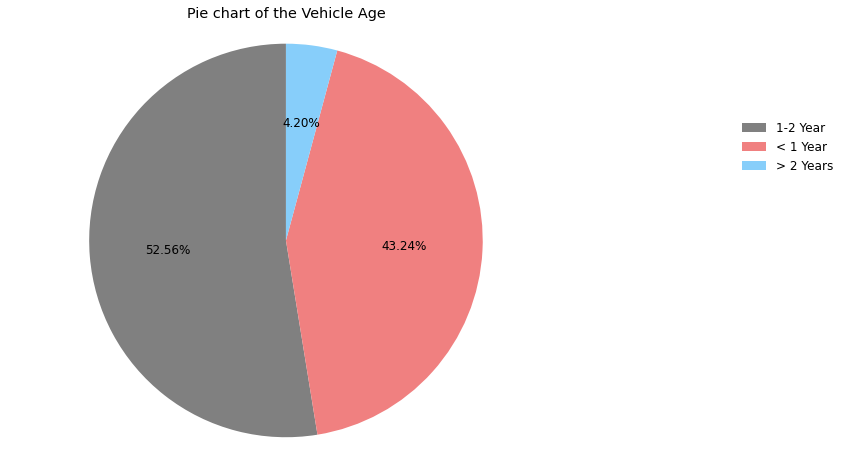

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

group = df1['vehicle_age'].value_counts(sort=False).reset_index(name= "counts")
color_palette_list = ['gray','lightcoral','lightskyblue']
#plt.figure(figsize=(20,5))
ax.pie(group['counts'],  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=90)
ax.axis('equal')
ax.set_title("Pie chart of the Vehicle Age")
ax.legend(labels=group['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

insight:
> From the pie chart, we can tell that clients whose vehicles' age is between 1 to 2 years are most likely to get the vehicle insurance.

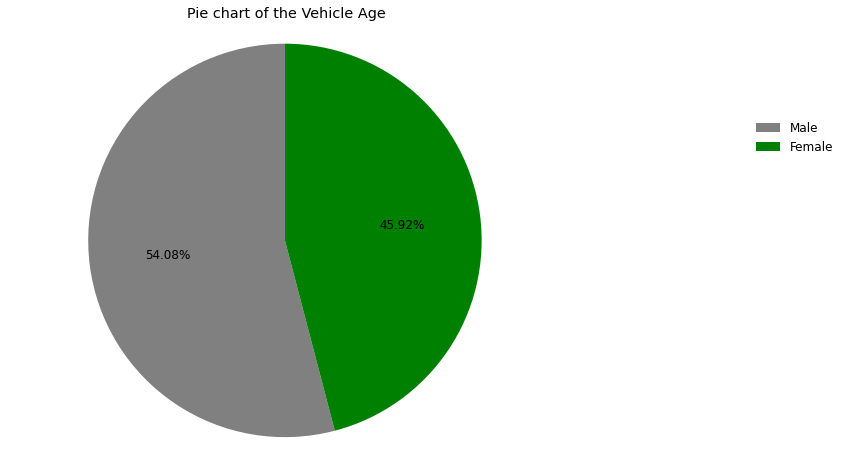

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

group = df1['gender'].value_counts(sort=False).reset_index(name= "counts")
color_palette_list = ['gray','green']
#plt.figure(figsize=(20,5))
ax.pie(group['counts'],  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=90)
ax.axis('equal')
ax.set_title('Pie chart of the Vehicle Age')
ax.legend(labels=group['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

insight:
> From the pie chart, we can determine that 54.08% of the clients in our dataset are male while 45.92% are female.

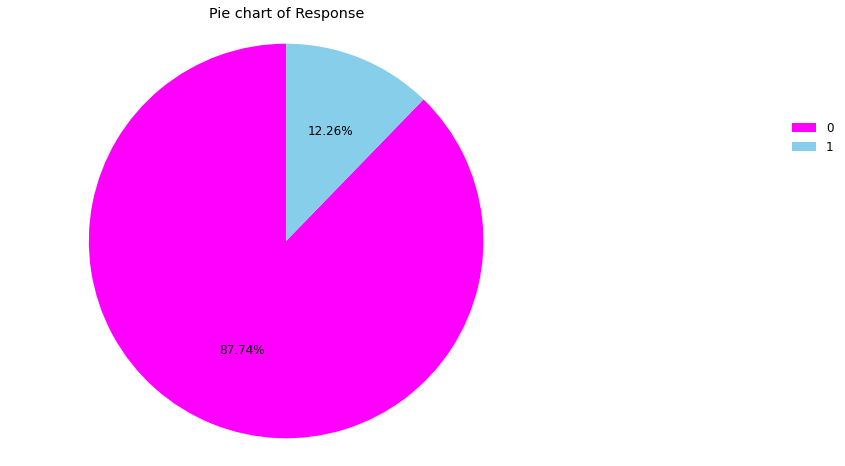

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

group = df1['response'].value_counts(sort=False).reset_index(name= "counts")
color_palette_list = ['Fuchsia','skyblue']
#plt.figure(figsize=(20,5))
ax.pie(group['counts'],  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=90)
ax.axis('equal')
ax.set_title('Pie chart of Response')
ax.legend(labels=group['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

> From the pie chart, we can conclude that only 12.26% of the total clients in our dataset would be willing to get the vehicle insurance.

### 5.1.2 Numerical Variables

In [ ]:
numerical_columns = df1[['age','annual_premium','vintage']]

#### i) Measures of Central Tendency

In [ ]:
# mean
print('Mean \n')
numerical_columns.mean()

Mean 



age                  38.822584
annual_premium    30564.389581
vintage             154.347397
dtype: float64

In [ ]:
# Mode
print('Mode \n')
numerical_columns.mode()

Mode 



,age,annual_premium,vintage
0,24,2630.0,256


In [ ]:
# Median
print('Median \n')
numerical_columns.median()

Median 



age                  36.0
annual_premium    31669.0
vintage             154.0
dtype: float64

#### ii) Measures of Dispersion

In [ ]:
# Standard Deviation
print('Standard Deviation \n')
numerical_columns.std()

Standard Deviation 



age                  15.511611
annual_premium    17213.155057
vintage              83.671304
dtype: float64

In [ ]:
# Variance
print('Variance \n')
numerical_columns.var()

Variance 



age               2.406101e+02
annual_premium    2.962927e+08
vintage           7.000887e+03
dtype: float64

In [ ]:
# Range
print('Range \n')
max = numerical_columns.max()
min = numerical_columns.min()

Range= max - min
Range

Range 



age                   65.0
annual_premium    537535.0
vintage              289.0
dtype: float64

In [ ]:
# Quantiles
print('Quantiles \n')
numerical_columns.quantile([0.25,0.5,0.75])

Quantiles 



,age,annual_premium,vintage
0.25,25.0,24405.0,82.0
0.50,36.0,31669.0,154.0
0.75,49.0,39400.0,227.0


In [ ]:
# Skewness
print("Skewness")
skew = numerical_columns.skew().reset_index(name="Skew_value")
skew.rename(columns={"index":"numerical_variables"},inplace=True)
skew.loc[skew['Skew_value'] == 0,'Status'] = "Symmetric"
skew.loc[skew['Skew_value'] > 0,'Status'] = "Positively skewed"
skew.loc[skew['Skew_value'] < 0,'Status'] = "Negatively skewed"
skew

Skewness


,numerical_variables,Skew_value,Status
0,age,0.672539,Positively skewed
1,annual_premium,1.766087,Positively skewed
2,vintage,0.003030,Positively skewed


Our dataset is positively skewed. This means that our mean is greater than the mode.

In [ ]:
# Kurtosis
print("Kurtosis")
kurtosis = numerical_columns.kurt().reset_index(name='Kurtosis_value')
kurtosis.rename(columns={"index":"numerical_variables"},inplace=True)
kurtosis.loc[kurtosis['Kurtosis_value'] == 0,'Status'] = "Mesokurtic"
kurtosis.loc[kurtosis['Kurtosis_value'] > 0,'Status'] = "Leptokurtic"
kurtosis.loc[kurtosis['Kurtosis_value'] < 0,'Status'] = "Platykurtic"
kurtosis

Kurtosis


,numerical_variables,Kurtosis_value,Status
0,age,-0.565655,Platykurtic
1,annual_premium,34.004569,Leptokurtic
2,vintage,-1.200688,Platykurtic


Our age and vintage are **Platykurtic**. Our Annual premium data is **Leptokurtic**.

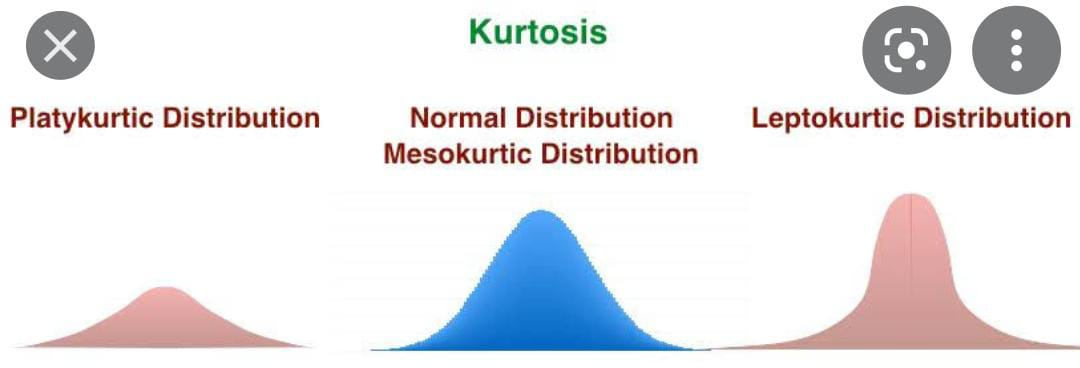

## 5.2 Bivariate Analysis

### 5.2.1 Categorical Variables

#### i) Bar Charts

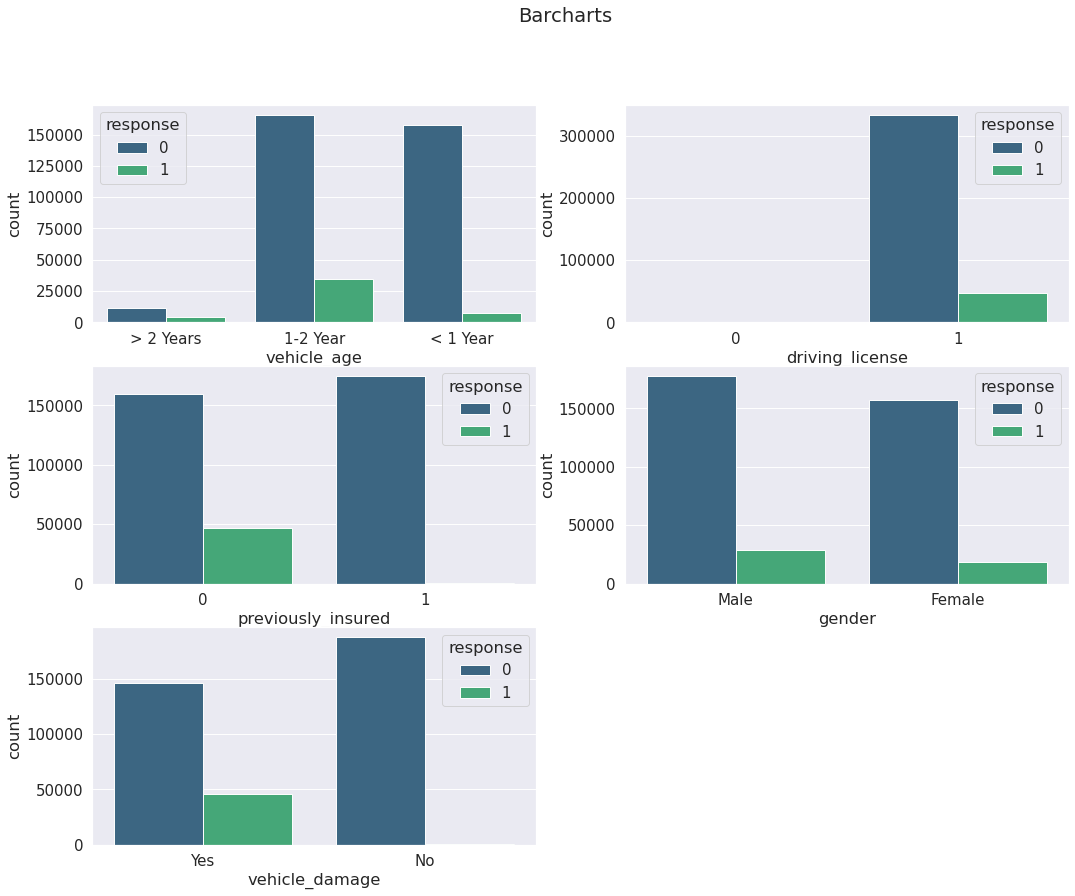

In [ ]:
# A general visualization of the bar charts in our train dataset
sns.set(font_scale=1.4)

ax=plt.figure(figsize=(18,14),dpi=70)

plt.subplot(321)
sns.countplot(x='vehicle_age', data=df1, hue='response',palette='viridis')
plt.subplot(322)
sns.countplot(x='driving_license', data=df1, hue='response',palette='viridis')
plt.subplot(323)
sns.countplot(x='previously_insured', data=df1, hue='response',palette='viridis')
plt.subplot(324)
sns.countplot(x='gender', data=df1, hue='response',palette='viridis')
plt.subplot(325)
sns.countplot(x='vehicle_damage', data=df1, hue='response',palette='viridis')
ax.suptitle('Barcharts')
plt.show()

> Insights:
* From the first barchart, clients whose vehicles ages are between 1 to 2 years are more likely to get the insurance followed by the clients whose car ages are less than 1 year.
* Clients who were not previously insured would most likely accept the Vehicle insurance
* Clients who have had their vehicles damaged would accept to have the vehicle insurance



### 5.2.2 Categorical and Numerical Variables

#### i) Histograms

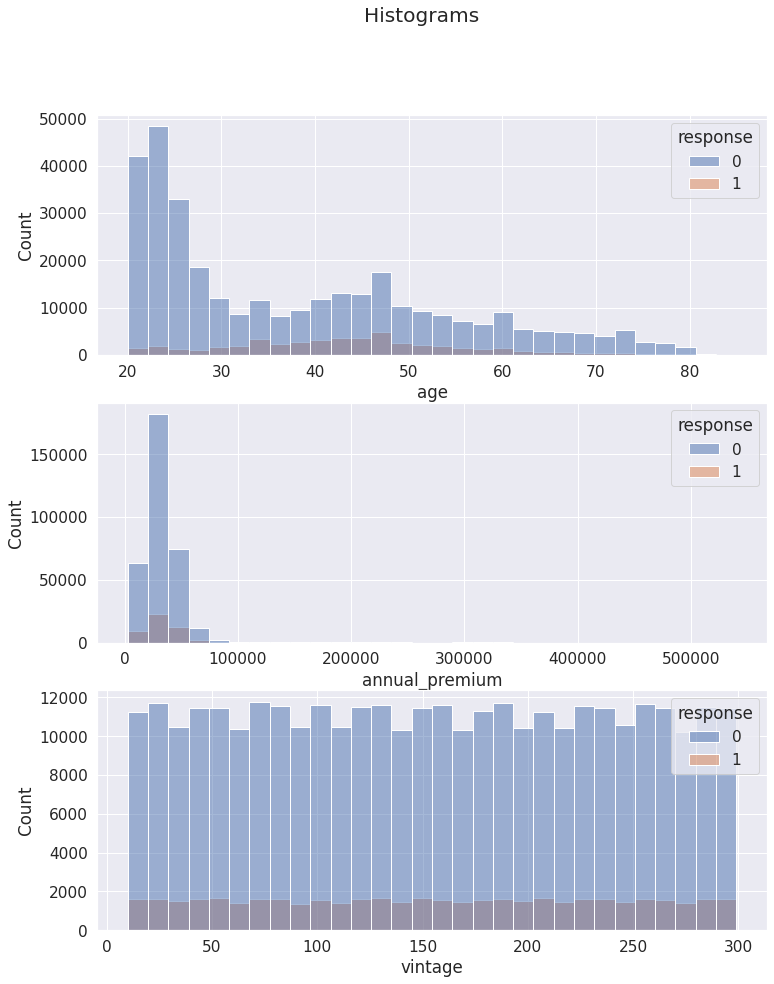

In [ ]:
# Histograms of the categorical and numerical variables
sns.set(font_scale=1.4)
ax = plt.figure(figsize=(12,15))

plt.subplot(311)
sns.histplot(data=df1, x= 'age', hue= 'response', bins=30)

plt.subplot(312)
sns.histplot(data=df1, x= 'annual_premium', hue= 'response', bins=30)

plt.subplot(313)
sns.histplot(data=df1, x= 'vintage', hue= 'response', bins=30)

ax.suptitle('Histograms')
plt.show()

* At the age group below 29, our clients are less likely to accept the vehicle insurance cover. Clients between the ages of 35 to 50 are most likely to accept vehicle insurance. 
* There is no significant relationship between the number of days a client has been with the company and whether or not they'd consider getting vehicle insurance.
* Most annual premium from clients accrue 45000-50000 Rupees.

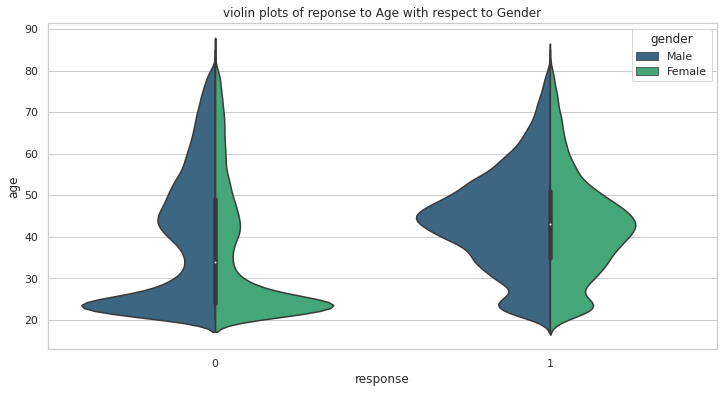

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style='whitegrid')
ax=sns.violinplot(x='response',y='age',hue='gender',data=df1,palette='viridis',split=True, scale='count',)
plt.title('violin plots of reponse to Age with respect to Gender')
plt.show()

Majority of the '0' responses for both male and female were aged 20-30 years. Majority of the '1' responses for both male and female were aged 40-50 years.

### 5.2.3 Numerical Variables

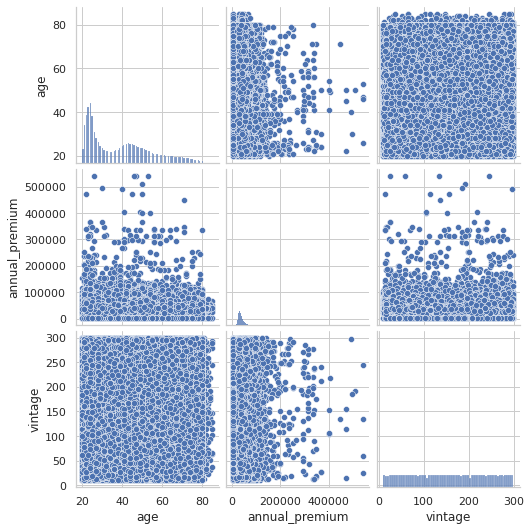

In [ ]:
sns.pairplot(numerical_columns)

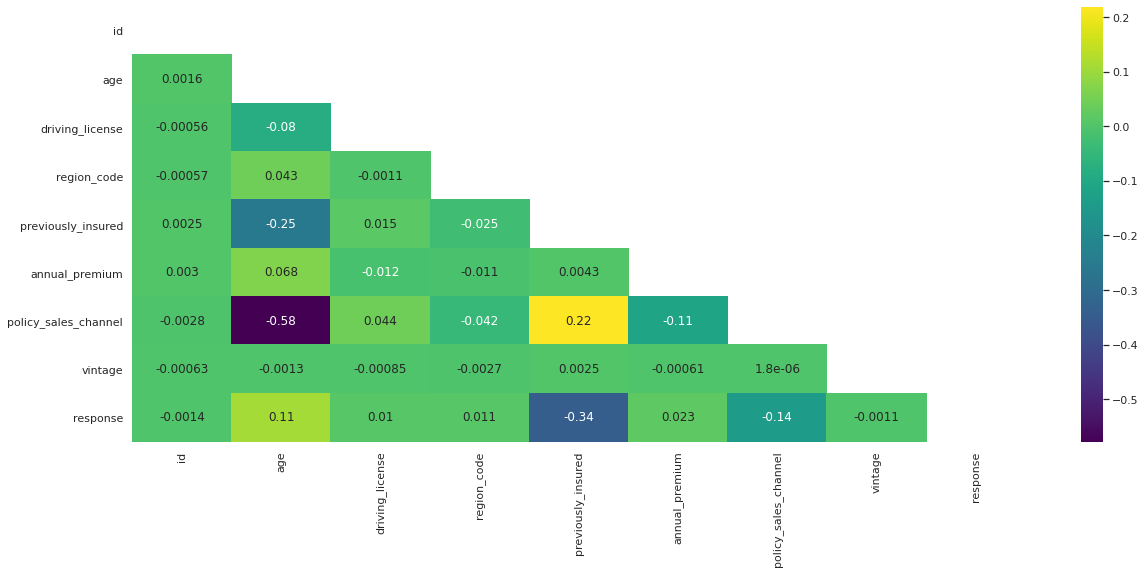

In [ ]:
#Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df1.corr(),
mask=mask,annot=True,cmap="viridis")

# 6.0 Implementing the solution

##### Checking for Multicollinearity

In [ ]:
# Removing the id column, we want to focus on our independent variables only.
independent_only = df1.drop(columns=['id','response'])

# the correlations between the variables
correlations=independent_only.corr()

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage
age,1.548624,0.083421,-0.025033,0.207515,-0.009169,0.843561,0.001426
driving_license,0.083421,1.006493,-0.002103,0.005284,0.006727,0.003702,0.000944
region_code,-0.025033,-0.002103,1.002691,0.012345,0.015309,0.027187,0.002702
previously_insured,0.207515,0.005284,0.012345,1.079605,-0.032046,-0.120274,-0.002457
annual_premium,-0.009169,0.006727,0.015309,-0.032046,1.014242,0.116947,0.000734
policy_sales_channel,0.843561,0.003702,0.027187,-0.120274,0.116947,1.528052,0.001518
vintage,0.001426,0.000944,0.002702,-0.002457,0.000734,0.001518,1.000017




*   VIF = 1: No Correlation
*   1 < VIF < 5 : Moderately Correlated 
*   VIF > 5 : Highly Correlated


As seen from the inverse correlation matrix there were no highly correlated feature variables.

###### Label Encoding

In [ ]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df1 ['gender'] = labelencoder.fit_transform(df1['gender'])
df2 ['gender'] = labelencoder.fit_transform(df2['gender'])

df2 ['vehicle_damage'] = labelencoder.fit_transform(df2['vehicle_damage'])
df1[['vehicle_damage']]= labelencoder.fit_transform(df1[['vehicle_age']])

df2[['vehicle_age']]=labelencoder.fit_transform(df2[['vehicle_age']])
df1[['vehicle_age']]=labelencoder.fit_transform(df1[['vehicle_age']])


In [ ]:
df1

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,1,44,1,28.0,0,2,2,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,2,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,1,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,1,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,2,44617.0,124.0,74,0


In [ ]:
df2

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,1,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,0,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,1,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,0,0,62875.0,26.0,265


#### Transformation of variables that had outliers

> As seen earlier , the annual premium variable had outliers which when used during implementation would make our model biased. Hence, there was need to transform the column using its log or its square root, plotting a histogram of each and choose the one that is normally distributed.

In [ ]:
#findinging the log of annual premium
df1["log_annual_premium"] = np.log10(df1['annual_premium'])
df1.head(1)
#findinging the sqrt of annual premium
df1["sqrt_annual_premium"] = np.sqrt(df1['annual_premium'])
df1.head(1)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,log_annual_premium,sqrt_annual_premium
0,1,1,44,1,28.0,0,2,2,40454.0,26.0,217,1,4.606961,201.131798


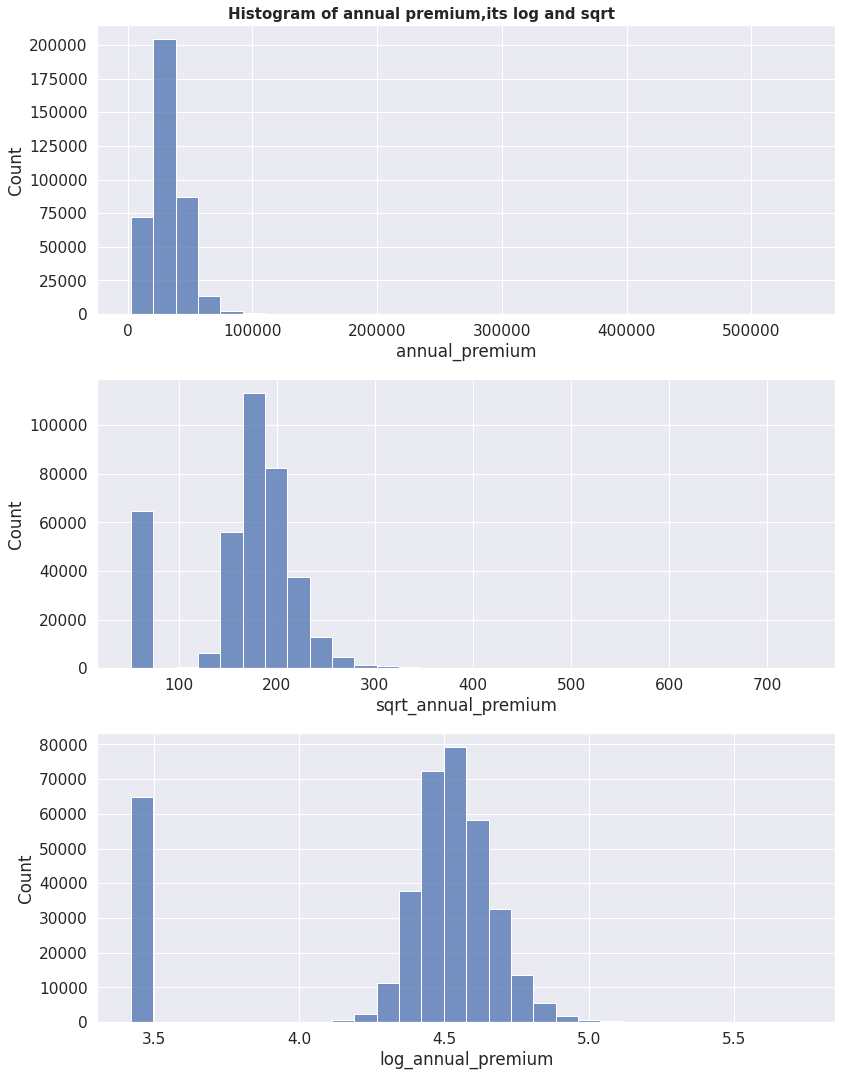

In [ ]:
# Histograms of the categorical and numerical variables
sns.set(font_scale=1.4)
ax = plt.figure(figsize=(12,15))

plt.subplot(311)
sns.histplot(data=df1, x= "annual_premium", bins=30)

plt.subplot(312)
sns.histplot(data=df1, x= "sqrt_annual_premium", bins=30)

plt.subplot(313)
sns.histplot(data=df1, x= "log_annual_premium", bins=30)
plt.suptitle('Histogram of annual premium,its log and sqrt',y=1.0,size=15,fontweight='bold')
plt.tight_layout()

> From the plot we can see that log of annual_premium is normally distributed. This means that instead of using annual premium variable for implementation, we will use the log_annual_premium.

## Normality test for the train dataset

id
Statistics=0.955, p=0.000
Sample does not look Gaussian


gender
Statistics=0.634, p=0.000
Sample does not look Gaussian


age
Statistics=0.911, p=0.000
Sample does not look Gaussian


driving_license
Statistics=0.021, p=0.000
Sample does not look Gaussian


region_code
Statistics=0.942, p=0.000
Sample does not look Gaussian


previously_insured
Statistics=0.632, p=0.000
Sample does not look Gaussian


vehicle_age
Statistics=0.713, p=0.000
Sample does not look Gaussian


vehicle_damage
Statistics=0.713, p=0.000
Sample does not look Gaussian


annual_premium
Statistics=0.873, p=0.000
Sample does not look Gaussian


policy_sales_channel
Statistics=0.720, p=0.000
Sample does not look Gaussian


vintage
Statistics=0.955, p=0.000
Sample does not look Gaussian


response
Statistics=0.383, p=0.000
Sample does not look Gaussian


log_annual_premium
Statistics=0.700, p=0.000
Sample does not look Gaussian


sqrt_annual_premium
Statistics=0.844, p=0.000
Sample does not look Gaussian




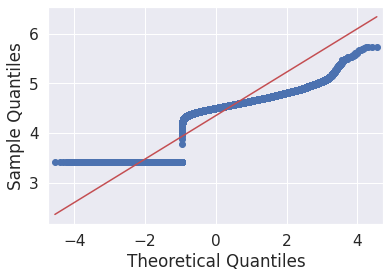

In [ ]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df1, col_list):
    for x in col_list:
        print(x)
        data = df1[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian')
        else:
            print('Sample does not look Gaussian')
        print('\n')
# shapiro Wilk's test
shapiro_test(df1, list(df1.columns))
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from numpy.random import seed
# seed the random number generator
seed(1)

# q-q plot
qqplot(df1['log_annual_premium'], line='s')
pyplot.show()

After log transformation, the annual premium feature is still not normally distributed.

In [ ]:
# Importing the relevant libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

###### Feature selection

In [ ]:
# Separating our target label (type) from the other features
X = df1.drop(['id','response'],axis=1)
y = df1['response']
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
                                  
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)                                 

,0
driving_license,1.286642
gender,0.133011
log_annual_premium,0.050842
sqrt_annual_premium,0.000340
region_code,0.000026
annual_premium,0.000002
vintage,-0.000004
policy_sales_channel,-0.004425
age,-0.007480
vehicle_damage,-0.110493


We wanted to see which features have more influence on our target variable.

### sampling

Random under-sampling since we have an imbalanced target variable.

Random under-sampling:
1    46710
0    46710
Name: response, dtype: int64


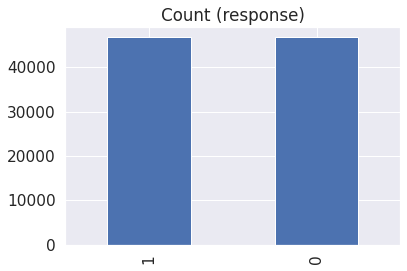

In [ ]:
# Class count
count_class_0, count_class_1 = df1.response.value_counts()

# Divide by class
df_class_0 = df1[df1['response'] == 0]
df_class_1 = df1[df1['response'] == 1]

# Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.response.value_counts())

df_test_under.response.value_counts().plot(kind='bar', title='Count (response)')

In [ ]:
df_test_under.shape[0]

93420

Sampling 10% of our data. 

In [ ]:
# We use stratified sampling
df_samp = df_test_under.groupby('response', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))


In [ ]:
df_samp.shape[0]

9342

In [ ]:
df_samp['response'].value_counts()

1    4671
0    4671
Name: response, dtype: int64

We use stratified sampling because it maintains the proportion of classes in our sample. We decided to use 10% of our undersampled data since it is an actual representation of our original data.

Splitting the features and target variable.

In [ ]:
X = df_samp.drop(['id','response','annual_premium','sqrt_annual_premium'],axis=1).values

y = df_samp['response']

In [ ]:
#spliting Dataset into Train and Test sets .Train dataset is 70% of the whole dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

without tuning for best parameters

In [ ]:
#training and making predictions
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()#using n_neighbors at 5 as the default settings
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predictions 
y_pred = clf.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 780  623]
 [   8 1392]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.99      0.56      0.71      1403
           1       0.69      0.99      0.82      1400

    accuracy                           0.77      2803
   macro avg       0.84      0.78      0.76      2803
weighted avg       0.84      0.77      0.76      2803



Hyperparameter tuning

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

parameters = {'penalty' : ['l1','l2'],
              'C' : [0.001,0.01,0.1,1.0,10,100,1000]}
              
# Creating grid search using 10-fold cross validation
clf = GridSearchCV(LogReg, param_grid = parameters, cv=10, scoring='accuracy', refit=True , n_jobs = -1)


clf.fit(X_train, y_train)
print('These are the best parameters for the model using a 10 fold cross validation :\n\n', clf.best_params_)

These are the best parameters for the model using a 10 fold cross validation :

 {'C': 0.001, 'penalty': 'l2'}


recreating the logistic regression model using the best performing parameters

In [ ]:
LogReg = LogisticRegression(C=0.001,penalty='l2')

LogReg.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predictions 
y_pred = LogReg.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 791  612]
 [  21 1379]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.97      0.56      0.71      1403
           1       0.69      0.98      0.81      1400

    accuracy                           0.77      2803
   macro avg       0.83      0.77      0.76      2803
weighted avg       0.83      0.77      0.76      2803



### Random Forest Classifier

without tuning for best parameters

In [ ]:
#training and making predictions
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predictions 
y_pred = clf.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 958  445]
 [ 185 1215]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      1403
           1       0.73      0.87      0.79      1400

    accuracy                           0.78      2803
   macro avg       0.79      0.78      0.77      2803
weighted avg       0.79      0.78      0.77      2803



Hyperparameter tuning

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


forest = RandomForestClassifier(random_state=0)


parameters={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
            'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
            'max_depth' : np.arange(1, 32, 4)}

forest_grid = RandomizedSearchCV(estimator=forest , param_distributions = parameters,scoring='accuracy', n_jobs=-1, refit=True, cv=10)

forest_grid = forest_grid.fit(X_train, y_train)

print("Random forest best parameters after 10 folds:", forest_grid.best_params_)


Random forest best parameters after 10 folds: {'n_estimators': 2000, 'min_samples_split': 0.30000000000000004, 'max_depth': 17}


Recreating the model using the best parameters

In [ ]:
forest = RandomForestClassifier(n_estimators= 2000, max_depth= 17, min_samples_split = 0.3 ,random_state=0)
forest = forest.fit(X_train, y_train)

In [ ]:
#predictions 
y_pred = forest.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 929  474]
 [ 158 1242]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.85      0.66      0.75      1403
           1       0.72      0.89      0.80      1400

    accuracy                           0.77      2803
   macro avg       0.79      0.77      0.77      2803
weighted avg       0.79      0.77      0.77      2803



#### Visualizing a decison tree from the  model

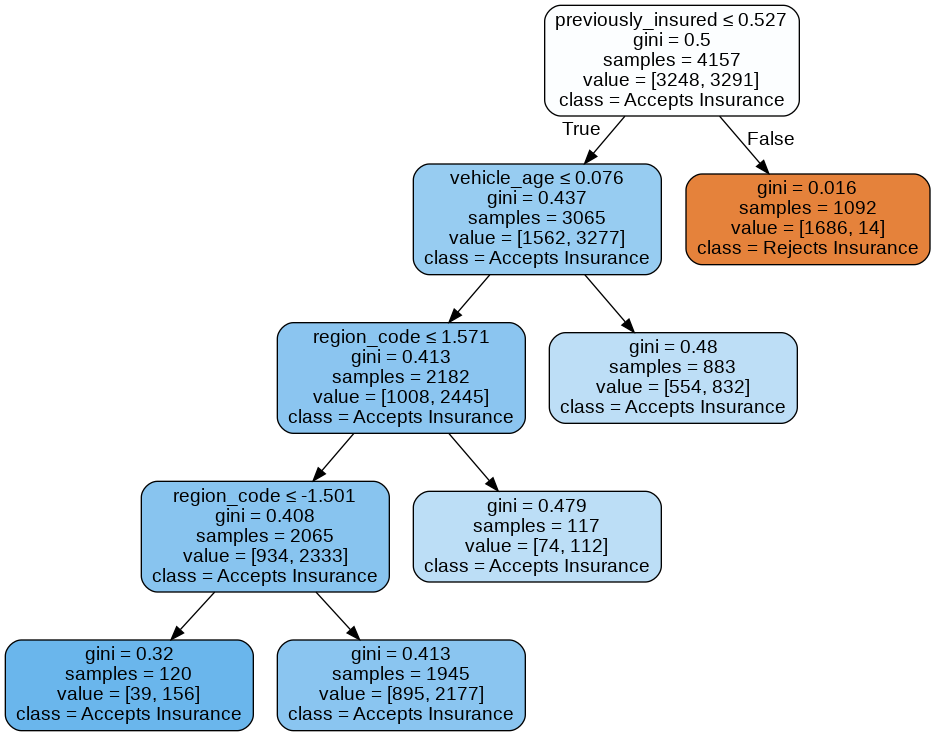

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


test_features = df_samp.columns.to_list()
test_features.remove('id')
test_features.remove('response')
test_features.remove('sqrt_annual_premium')
test_features.remove('annual_premium')


dot_data = StringIO()
tree = forest.estimators_[500]
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Rejects Insurance', 'Accepts Insurance'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('insurance_forest.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('gender', 0.0), ('age', 0.19), ('driving_license', 0.0), ('region_code', 0.01), ('previously_insured', 0.54), ('vehicle_age', 0.07), ('vehicle_damage', 0.06), ('policy_sales_channel', 0.12), ('vintage', 0.0), ('log_annual_premium', 0.01)]

Variable: previously_insured   Importance: 0.54
Variable: age                  Importance: 0.19
Variable: policy_sales_channel Importance: 0.12
Variable: vehicle_age          Importance: 0.07
Variable: vehicle_damage       Importance: 0.06
Variable: region_code          Importance: 0.01
Variable: log_annual_premium   Importance: 0.01
Variable: gender               Importance: 0.0
Variable: driving_license      Importance: 0.0
Variable: vintage              Importance: 0.0


* From the list above, we can determine that the previously insured feature is the most important in determining the response of the client followed by age feature.
*  We also get to see that gender, having a driving license and the number of days a client has been with the company does not have much influence on whether a client will get to have a vehicle insurance cover


### Support Vector Classifier

Fitting a model:Using Linear function Kernel

In [ ]:
from sklearn.svm import SVC

linear_svc = SVC(kernel = 'linear')

parameters={'C' : [0.001,0.01,0.1,1.0]}

linear_svc_grid = RandomizedSearchCV(estimator = linear_svc,  param_distributions = parameters , n_jobs=-1 ,refit=True, cv=5 )

linear_svc_grid = linear_svc_grid.fit(X_train,y_train)

print("Linear SVC best parameters:", linear_svc_grid.best_params_)

Linear SVC best parameters: {'C': 0.01}


In [ ]:
# Let's now build the svm model 
linear_svc = SVC(C= 0.01,kernel = 'linear')
# Train the model using the training set
linear_svc=linear_svc.fit(X_train,y_train)

In [ ]:
# Predict the response for the test set
y_pred_linear = linear_svc.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_linear))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred_linear))

Confusion Matrix 
 [[ 779  624]
 [   6 1394]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.99      0.56      0.71      1403
           1       0.69      1.00      0.82      1400

    accuracy                           0.78      2803
   macro avg       0.84      0.78      0.76      2803
weighted avg       0.84      0.78      0.76      2803



Fitting a model: Using Polymomial function Kernel

In [ ]:
from sklearn.svm import SVC

poly_svc = SVC(C=0.01,kernel='poly',gamma='auto')

parameters={'degree':[2, 3, 4, 5, 6]}

poly_svc_grid = GridSearchCV(estimator = poly_svc , param_grid = parameters , n_jobs=-1 ,refit=True, cv=5 )

poly_svc_grid = poly_svc_grid.fit(X_train,y_train)

print("Polynomial SVC best parameters:", poly_svc_grid.best_params_)

Polynomial SVC best parameters: {'degree': 3}


In [ ]:
# Building the model 
poly_svc = SVC(C = 0.01 , kernel='poly', degree = 3 , gamma='auto')
# Training the model using the training set
poly_svc.fit(X_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict the response for the test set
y_pred_poly = poly_svc.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_poly))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred_poly))

Confusion Matrix 
 [[ 771  632]
 [   6 1394]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.99      0.55      0.71      1403
           1       0.69      1.00      0.81      1400

    accuracy                           0.77      2803
   macro avg       0.84      0.77      0.76      2803
weighted avg       0.84      0.77      0.76      2803



Fitting a model: Using Gaussian radial basis function (RBF) Kernel

In [ ]:
from sklearn.svm import SVC

rbf_svc = SVC(C=0.01,kernel='rbf')

parameters={'gamma' :['auto','scale']}

rbf_svc_grid = GridSearchCV(estimator = rbf_svc , param_grid = parameters , n_jobs=-1 ,refit=True, cv=5 )

rbf_svc_grid = rbf_svc_grid.fit(X_train,y_train)

print("RBF SVC best parameters:", rbf_svc_grid.best_params_)

RBF SVC best parameters: {'gamma': 'auto'}


In [ ]:
# Building the model 
rbf_svc = SVC(C=0.001 , kernel='rbf' , gamma='auto')
# Training the model using the training set
rbf_svc.fit(X_train, y_train)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict the response for the test set
y_pred_rbf = rbf_svc.predict(X_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_rbf))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred_rbf))

Confusion Matrix 
 [[ 221 1182]
 [   0 1400]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       1.00      0.16      0.27      1403
           1       0.54      1.00      0.70      1400

    accuracy                           0.58      2803
   macro avg       0.77      0.58      0.49      2803
weighted avg       0.77      0.58      0.49      2803



### K Nearest Neighbours

In [ ]:
#without cross validation

strat_df1 = df_test_under.groupby('response', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
x = strat_df1.drop(['id','response'],axis=1)
y = strat_df1['response'].values

In [ ]:
#splitting the dataset into train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#training and making predictions
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5)#using n_neighbors at 5 as the default settings
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#predictions 
y_pred = clf.predict(x_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 950  453]
 [ 257 1143]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.79      0.68      0.73      1403
           1       0.72      0.82      0.76      1400

    accuracy                           0.75      2803
   macro avg       0.75      0.75      0.75      2803
weighted avg       0.75      0.75      0.75      2803



#### Hyperparameter Tuning

In [ ]:
leaf_size = list(range(1,50))
#n_neighbors = list(range(1,30))
p = [1,2] # when p is 1 the Model has used Manhattan distance, however if its 2 it uses Euclidean
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
metric = ['mikonski','euclidean','manhattan','chebyshev']
k = np.random.randint(1,50,60)#finding random numbers from 1 to 50 (60 values)
#converting to dictionary
hyperparameters = dict(leaf_size=leaf_size,n_neighbors=k,p=p,weights=weights,algorithm=algorithm,metric=metric)
#creating a new KNN model

#trying to use random search but its taking a long time to search it could be the problem is the
#size of the dataset

new_KNN = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf = RandomizedSearchCV(new_KNN,hyperparameters,n_iter=5,n_jobs=-1,verbose = 0,cv=10)#if verbose is set to true, we are telling the computer to tell 
#us everything its doing which be a slower process,n_jobs set to -1 means that 
#all the cpu is being used
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 1...
                                                   'manhattan', 'chebyshev'],
                        

In [ ]:
#printing the best parameters
print(print('Best parameters:', clf.best_params_))
print('Best leaf_size:', clf.best_estimator_.get_params()['leaf_size'])
print('\nBest p: ',clf.best_estimator_.get_params()['p'])
print('\nBest n_neighbors: ',clf.best_estimator_.get_params()['n_neighbors'])

Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 24, 'metric': 'euclidean', 'leaf_size': 20, 'algorithm': 'auto'}
None
Best leaf_size: 20

Best p:  1

Best n_neighbors:  24


In [ ]:
#Model prediction and evaluation
#
best_knn = KNeighborsClassifier(n_neighbors=24,weights='uniform',leaf_size = 3,p=1,algorithm='auto',metric='euclidean')
best_knn.fit(x_train,y_train)
y_pred = best_knn.predict(x_test)
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report \n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 907  496]
 [ 123 1277]]
----------------------------------------------------

 Classification report 
               precision    recall  f1-score   support

           0       0.88      0.65      0.75      1403
           1       0.72      0.91      0.80      1400

    accuracy                           0.78      2803
   macro avg       0.80      0.78      0.78      2803
weighted avg       0.80      0.78      0.78      2803



### Naive Bayes 

In [ ]:
#importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB().fit(x_train,y_train)
#model prediction and evaluation
y_pred = naive_model.predict(x_test) 
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
print('-----------------------------------------------')
print('Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 762  641]
 [   9 1391]]
-----------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.54      0.70      1403
           1       0.68      0.99      0.81      1400

    accuracy                           0.77      2803
   macro avg       0.84      0.77      0.76      2803
weighted avg       0.84      0.77      0.76      2803



#### Hyperparameter Tuning

In [ ]:
model = GaussianNB()
params = {'var_smoothing' : np.logspace(0,-9,num=100)}#a list of possible alphas
#to learn or not to learn prior class probabilities

gridsearch = GridSearchCV(param_grid=params,estimator=model,cv=10,n_jobs=-1,scoring='accuracy')
gridsearch.fit(x_train,y_train)
print('Best params:',gridsearch.best_params_)

Best params: {'var_smoothing': 0.533669923120631}


In [ ]:
#model prediction and evaluation
naive = GaussianNB(var_smoothing=0.533669923120631)

naive.fit(x_train,y_train)
y_pred = naive.predict(x_test)
print('\nConfusion matrix \n',confusion_matrix(y_test,y_pred))
print('-----------------------------------------')
print('\n Classification report \n',classification_report(y_test,y_pred))


Confusion matrix 
 [[ 823  580]
 [  45 1355]]
-----------------------------------------

 Classification report 
               precision    recall  f1-score   support

           0       0.95      0.59      0.72      1403
           1       0.70      0.97      0.81      1400

    accuracy                           0.78      2803
   macro avg       0.82      0.78      0.77      2803
weighted avg       0.82      0.78      0.77      2803



### Neural Network 

In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

Creating our model using Adam optimizer and 100 epochs. 
* Benefits of adam(Adaptive Moment Estimation):
straight forward to implement,computationally inexepensive,little memory requirements,well suited for problems that are large in terms of data parameters.


Relu solves the problem of vanishing gradient during backpropagation. Binary crossentropy loss of binary variables between true labels and predicted labels. Sigmoid applies when the target column is binary.


In [ ]:
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

We fitted our model using 100 epochs and setting our validation data with X_test and y_test.

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
205/205 [==============================] - 4s 4ms/step - loss: 0.5621 - accuracy: 0.7090 - val_loss: 0.4622 - val_accuracy: 0.7688
Epoch 2/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4542 - accuracy: 0.7715 - val_loss: 0.4491 - val_accuracy: 0.7792
Epoch 3/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4492 - accuracy: 0.7802 - val_loss: 0.4482 - val_accuracy: 0.7792
Epoch 4/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4465 - accuracy: 0.7802 - val_loss: 0.4456 - val_accuracy: 0.7809
Epoch 5/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.7841 - val_loss: 0.4440 - val_accuracy: 0.7795
Epoch 6/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.7847 - val_loss: 0.4437 - val_accuracy: 0.7820
Epoch 7/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.7845 - val_loss: 0.4452 - val_accuracy: 0.7792

We evaluate the performance of our model by monitoring the validation loss.

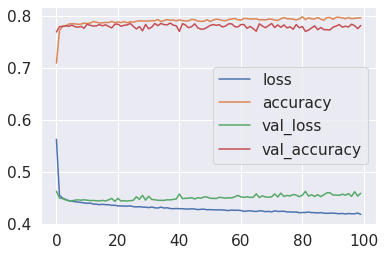

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Early Stopping 


In [ ]:
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
# import early stopping ,we're monitoring the validation loss in order to minimize it.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100
205/205 [==============================] - 1s 4ms/step - loss: 0.5618 - accuracy: 0.7221 - val_loss: 0.4662 - val_accuracy: 0.7653
Epoch 2/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.7746 - val_loss: 0.4492 - val_accuracy: 0.7756
Epoch 3/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4475 - accuracy: 0.7761 - val_loss: 0.4494 - val_accuracy: 0.7717
Epoch 4/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.7805 - val_loss: 0.4470 - val_accuracy: 0.7752
Epoch 5/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4440 - accuracy: 0.7809 - val_loss: 0.4451 - val_accuracy: 0.7752
Epoch 6/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.7789 - val_loss: 0.4454 - val_accuracy: 0.7788
Epoch 7/100
205/205 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7805 - val_loss: 0.4472 - val_accuracy: 0.7717

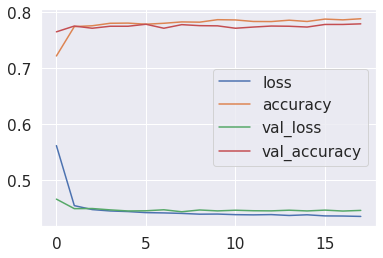

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

To avoid overfitting we'll add in Dropout Layers to drop some neurons.

In [ ]:
# recreating the model using dropout layers
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100
205/205 [==============================] - 2s 4ms/step - loss: 0.7297 - accuracy: 0.5114 - val_loss: 0.6911 - val_accuracy: 0.4995
Epoch 2/100
205/205 [==============================] - 1s 3ms/step - loss: 0.6988 - accuracy: 0.5050 - val_loss: 0.6903 - val_accuracy: 0.5005
Epoch 3/100
205/205 [==============================] - 1s 3ms/step - loss: 0.6892 - accuracy: 0.5348 - val_loss: 0.6867 - val_accuracy: 0.5897
Epoch 4/100
205/205 [==============================] - 1s 3ms/step - loss: 0.6830 - accuracy: 0.5593 - val_loss: 0.6745 - val_accuracy: 0.7028
Epoch 5/100
205/205 [==============================] - 1s 3ms/step - loss: 0.6690 - accuracy: 0.5918 - val_loss: 0.6407 - val_accuracy: 0.7413
Epoch 6/100
205/205 [==============================] - 1s 3ms/step - loss: 0.6363 - accuracy: 0.6247 - val_loss: 0.5688 - val_accuracy: 0.7738
Epoch 7/100
205/205 [==============================] - 1s 3ms/step - loss: 0.5928 - accuracy: 0.6750 - val_loss: 0.4866 - val_accuracy: 0.7738

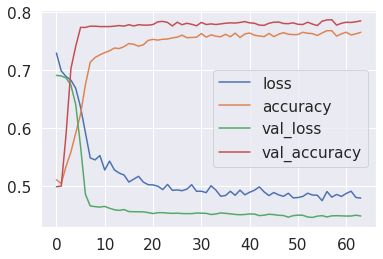

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

At roughly 50 epochs we achieved our minimal validation loss.

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print('confusion matrix\n',confusion_matrix(y_test,predictions))

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[ 838  565]
 [  37 1363]]

classification report
               precision    recall  f1-score   support

           0       0.96      0.60      0.74      1403
           1       0.71      0.97      0.82      1400

    accuracy                           0.79      2803
   macro avg       0.83      0.79      0.78      2803
weighted avg       0.83      0.79      0.78      2803



# Conclusions

The accuracies for the models are as follows (Note: this is after hyperparameter tuning)
* our base model (**Logistic Regression**) had an accuracy of ~ **77%**
* the **Random Forest Classifier** had an accuracy score of ~ **79%**
* Under **Support Vector Classifiers**, using the **linear Kernel**,**polynomial kernel** and the **RBF kernel** accrued an accuracy score of  ~**77%**, ~**76%** and ~**54%** respectively
* The **K Nearest Neighbours**  had an accuracy score of ~ **75%** 
* The **Naive Bayes** had an accuracy score of ~ **77%**
* and finaly, the **Neural Networks** had an accuracy score of ~**79%**


Random Forest  Classiifer is the best model for this particular dataset.
from the RandomForest classifier we were able to  determine the important features were: 
* whether the clients were previously insured
* the age of the clients
* policy sales channel


while the least important features were
* gender               
* driving_license      
* vintage    

# Challenging the solution

### XGBoost

In [ ]:
X= df_samp[['previously_insured','age','policy_sales_channel']].values
y= df_samp['response']

In [ ]:
#Train using 70% of our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


In [ ]:
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 910  478]
 [ 112 1303]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.89      0.66      0.76      1388
           1       0.73      0.92      0.82      1415

    accuracy                           0.79      2803
   macro avg       0.81      0.79      0.79      2803
weighted avg       0.81      0.79      0.79      2803



##### Hyperparameter tuning XGBoost

In [ ]:
xgb=XGBClassifier()
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [ ]:
# A parameter grid for XGBoost
params = {
        'booster': ['gbtree','dart'],
        'learning_rate': [0.01,0.1,0.5],
        'n_estimators': [50,100,200],
        'max_depth': [3,5,10]
        }

In [ ]:
clf = RandomizedSearchCV(xgb,params, cv=5, scoring='accuracy', refit=True , n_jobs = -1)
clf.fit(X_train, y_train)
print('These are the best parameters for the model using a 5 fold cross validation :\n\n', clf.best_params_)

These are the best parameters for the model using a 10 fold cross validation :

 {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'booster': 'gbtree'}


###### Refitting our model using the hyperparameter tuning.

In [ ]:
xgb = XGBClassifier(booster='gbtree',learning_rate= 0.1,max_depth=3,n_estimators=50)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [ ]:
#computing the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('----------------------------------------------------')
print('\n Classification report\n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[ 894  494]
 [ 112 1303]]
----------------------------------------------------

 Classification report
               precision    recall  f1-score   support

           0       0.89      0.64      0.75      1388
           1       0.73      0.92      0.81      1415

    accuracy                           0.78      2803
   macro avg       0.81      0.78      0.78      2803
weighted avg       0.81      0.78      0.78      2803



XGBoost classifier is a better performing model with a score of **79%** after feature selection. After hyperparameter tuning the accuracy dropped.

# Recommendations

* We recommend that the insurance company should further asssess why their existing clients are not interested in the vehicle insurance cover.
* Clients between the ages of 35 to 50  and those whose vehicles are between 1 to 2 years of age are most likely to accept vehicle insurance.
* Revise the health insurance policy to make it more affordable so that the clients may consider taking another cover with the insurance company.